## Lecture 3 kernel - $15^{th}$ December 2023

This notebook presentation is part of my lecture material for the Advanced Quantum Mechanics course at the University of Trieste. It contains a general introduction to quantum kernel with Qiskit ad Quask.

**Michele Grossi**, Senior Researcher @ CERN


# Quantum Kernels Tutorial: From Classical to Quantum


# Classical kernels
Let us dive into classical machine learning and perform classification with classical kernels.

## Motivation
In many cases, our data is not linearly separable. In the case of binary classification, this means that we cannot find a hyperplane in our feature space such that it perfectly separates the two classes.

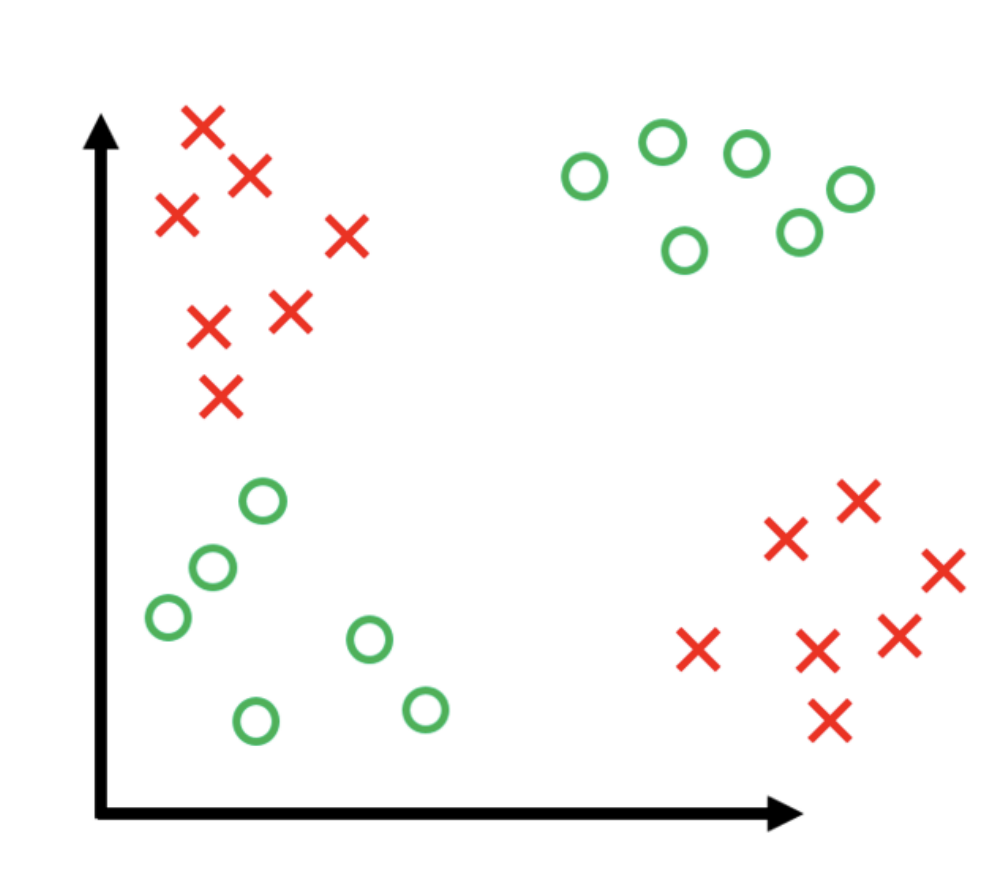



we will now see how a simple kernel can help us transform this data into a new space where it is lineraly separable.

## Polynomial kernel
<p>The polynomial kernel is given by:</p>
<p><i>K(x, y)</i> = (<i>x</i> &middot; <i>y</i> + <i>c</i>)<sup><i>d</i></sup></p>
<p>where <i>x</i> and <i>y</i> are input vectors, <i>c</i> is a constant (often set to 1), and <i>d</i> is the degree of the polynomial.

This kernel function implicitly maps the inputs into a higher-dimensional space, allowing linear algorithms to find nonlinear patterns in the data.</p>

We demonstrate the power for the almost trivial case of d = 1, c = 0 in code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x,y)
Z = X*Y

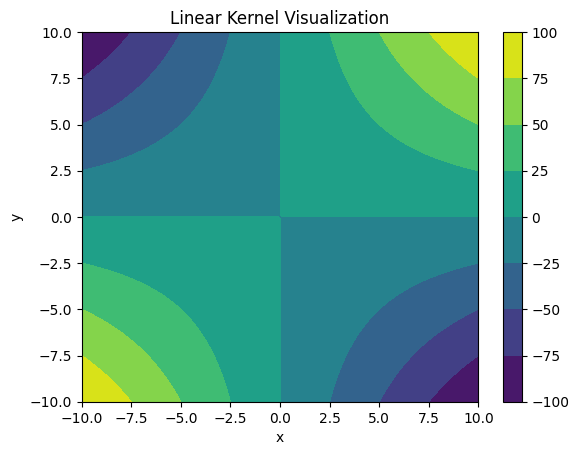

In [2]:
# Plot
plt.contourf(X, Y, Z)
plt.title('Linear Kernel Visualization')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

## Kernel comparison (Exercise)
Idea: There are many different types of kernels, and often we have to find the best one for our specific dataset.

Task: Check the documentation of sklearn and evaluate kernels visually using the dataset and visualization tools prepared below.

Bonus question: How could we benchmark the kernels?

In [3]:
from sklearn.datasets import make_classification
from sklearn import svm

# Generate synthetic data
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

In [4]:
def plot_svm(kernel):
    clf = svm.SVC(kernel=kernel, gamma='auto')
    clf.fit(X, y)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(clf)
    plt.title('SVM with ' + kernel + ' kernel')
    plt.show()

def plot_svc_decision_function(clf):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    assert len(clf.support_vectors_) > 0, "No support vectors found!"
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               facecolors='none', edgecolors='k', marker='o')
    return


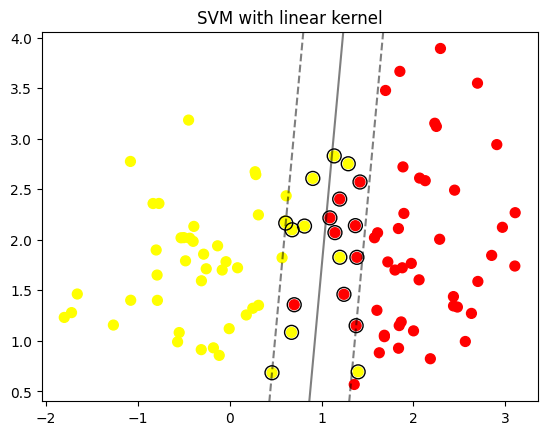

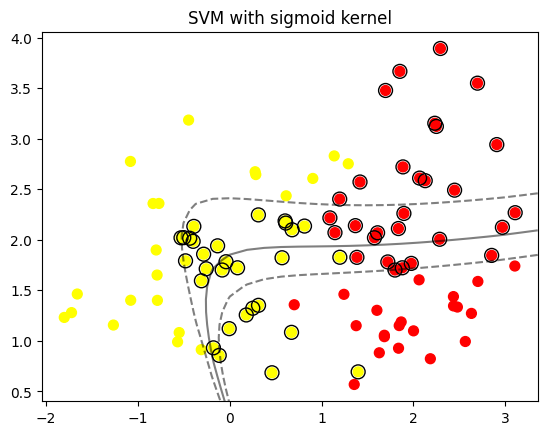

In [5]:
# Todo: Try the different kernels from sklearn.
plot_svm(kernel="linear")
plot_svm(kernel="sigmoid")

## Quantitative comparison
Benchmarks the kernels by completing the following steps.

In [6]:
def calculate_generalization_accuracy(
    training_gram, training_labels, testing_gram, testing_labels
):
    """
    Calculate accuracy w.r.t. a precomputed kernel, a training and testing set

    Args:
        training_gram: Gram matrix of the training set, must have shape (N,N)
        training_labels: Labels of the training set, must have shape (N,)
        testing_gram: Gram matrix of the testing set, must have shape (M,N)
        testing_labels: Labels of the training set, must have shape (M,)

    Returns:
        generalization accuracy (float)
    """
    svm = SVC(kernel="precomputed")
    svm.fit(training_gram, training_labels)
    y_predict = svm.predict(testing_gram)
    correct = np.sum(testing_labels == y_predict)
    accuracy = correct / len(testing_labels)
    return accuracy

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import linear_kernel, rbf_kernel, polynomial_kernel
from sklearn.svm import SVC

# Todo: Perform a train test split.
# Hint: Use X and y generated before.
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Compute the linear kernel
lin_ker_tr = linear_kernel(X_train)
lin_ker_te = linear_kernel(X_test, X_train)

# Todo: Do the same for the rbf and polynomial kernel
# rbf_ker_tr =
# rbf_ker_te =
# poly_ker_tr =
# poly_ker_te =

# Evaluate the accuracy
lin_acc = calculate_generalization_accuracy(lin_ker_tr, y_train, lin_ker_te, y_test)
# rbf_acc =
# poly_acc =

# Print the result
print(f"linear: {lin_acc}")
# print(f"rbf: {rbf_acc}")
# print(f"poly: {poly_acc}")

linear: 0.96


## Non-linear data separation: RBF Kernel
<p>Another powerful kernel used in machine learning is the Radial Basis Function (RBF) kernel, also known as the Gaussian kernel:</p>
<p><i>K(x, y)</i> = exp(<sup><i>-||x - y||</i><sup>2</sup></sup> / (2<i>σ</i><sup>2</sup>))</p>
<p>where <i>σ</i> is the width of the Gaussian function. The RBF kernel is particularly useful as it can project data into an infinite-dimensional space, often making it linearly separable.</p>


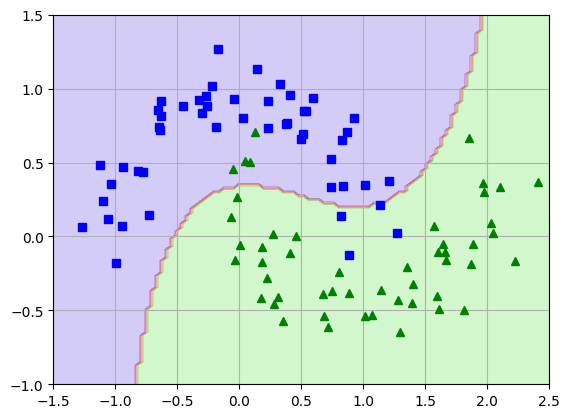

In [8]:
from sklearn.datasets import make_moons

# Generate synthetic data
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X, y)
plot_predictions(clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

## Quantum Kernels in Qiskit
In this example, we'll encode the classical data point x=(−0.1,0.2) using the ZZFeatureMap in Qiskit.

In [ ]:
#!pip install qiskit-aer

In [9]:
from qiskit.circuit.library import ZZFeatureMap
import matplotlib.pyplot as plt

# Define the classical data.
x = [-0.15, 0.28]

# Setup the feature map and encode the data.
feature_map = ZZFeatureMap(feature_dimension=len(x), reps=1, insert_barriers=True)
encoded_data = feature_map.bind_parameters(x)

In [11]:
# Display the quantum circuit
print(encoded_data.decompose().draw('text'))

     ┌───┐ ░ ┌─────────┐                       
q_0: ┤ H ├─░─┤ P(-0.3) ├──■─────────────────■──
     ├───┤ ░ ├─────────┤┌─┴─┐┌───────────┐┌─┴─┐
q_1: ┤ H ├─░─┤ P(0.56) ├┤ X ├┤ P(18.838) ├┤ X ├
     └───┘ ░ └─────────┘└───┘└───────────┘└───┘


## Feature maps (Exercise)


**1. Explore Different Feature Maps:**

Using the ZFeatureMap and PauliFeatureMap classes in Qiskit, create quantum circuits that encode the same data point x as used in the example above. Compare the circuits with the one generated using ZZFeatureMap.

**2. Change Repetitions:**

Modify the number of repetitions (reps) in the ZZFeatureMap from the example. How does the circuit change? What effect might this have on encoding?
Encode Different Data Points: Choose two new data points and encode them using the ZZFeatureMap.

**3. Compare the resulting circuits:**

How does the circuit change with different data?


**Hints**

* For the ZFeatureMap, you may use the code ZFeatureMap(feature_dimension=len(x), reps=2) to create the map.

* For the PauliFeatureMap, you may use the code PauliFeatureMap(feature_dimension=len(x), reps=2, paulis=['Z', 'X']) to create the map.

* Remember to use bind_parameters to bind the data to the circuit, and print the circuit using print(circuit.decompose().draw('text')).







## Quantum Kernels (Example)
We already saw quantum feature maps in action. Here is an example of the simulation of a quantum kernel value for two data points with the ZZFeatureMap.

In [12]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.quantum_info import Statevector

# Define the classical data.
x_i = [-0.15, 0.28]

# Todo: Try x_j = [-0.15, 0.28] as sanity check. To you get the expected result?
x_j = [0.12, -0.07]

# Setup the feature map.
feature_map = ZZFeatureMap(feature_dimension=len(x_i), reps=1)

# Encode the data.
encoded_x_i = feature_map.bind_parameters(x_i)
encoded_x_j = feature_map.bind_parameters(x_j)

# Get the statevector for both data points.
statevector_i = Statevector.from_instruction(encoded_x_i)
statevector_j = Statevector.from_instruction(encoded_x_j)

# Calculate the quantum kernel.
kernel_value = abs(statevector_j.conjugate().data @ statevector_i.data)**2
print("Quantum Kernel Value:", kernel_value)

Quantum Kernel Value: 0.7555415102103611


## Building a Support Vector Machine with a Quantum Kernel (Exercise)
In this exercise, you will build a simple support vector machine (SVM) using the quantum kernel calculated from two data points from before. You will use the ZZFeatureMap for encoding the data.

**Your tasks:**

* Implement a function quantum_kernel that takes two data points as input and returns the kernel value using the method provided above.
* Build a support vector machine using the calculated quantum kernel for the two given data points with labels y_i = 1 and y_j = -1.
* Train the SVM on these data points and test the prediction.

**Hint**

You can use any SVM library that allows custom kernels. For instance, you can use the SVC class from scikit-learn with the precomputed kernel option.

In [13]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.quantum_info import Statevector
from qiskit import Aer, execute, QuantumCircuit
from sklearn.svm import SVC
import numpy as np

# Todo: Implement.
def quantum_kernel(x1, x2):
    assert len(x1) == len(x2)
    feature_map = ZZFeatureMap(feature_dimension=len(x1), reps=1)
    encoded_x_i = feature_map.bind_parameters(x1)
    encoded_x_j = feature_map.bind_parameters(x2)
    statevector_i = Statevector.from_instruction(encoded_x_i)
    statevector_j = Statevector.from_instruction(encoded_x_j)
    kernel_value = abs(statevector_j.conjugate().data @ statevector_i.data)**2
    return kernel_value

# Data points and labels
X = np.array([[-0.15, 0.28], [0.12, -0.07]])
y = np.array([1, -1])

# Compute the kernel matrix
K = np.array([[quantum_kernel(X[i], X[j]) for j in range(len(X))] for i in range(len(X))])

# Train the SVM
qsvm = SVC(kernel='precomputed')
qsvm.fit(K, y)

# Predict
predictions = qsvm.predict(K)
print("Predictions:", predictions)

Predictions: [ 1 -1]


Clearly, we have to employ a quantum circuit when estimating the quantum kernel on actual hardware. This quantum circuit is the overlap test:

In [14]:
# How to construct a circuit based on the overlap test
def quantum_kernel_with_shots(x1, x2, shots=1000):
    assert len(x1) == len(x2)
    n = len(x1)
    feature_map = ZZFeatureMap(feature_dimension=n, reps=1)
    encoded_x_i = feature_map.bind_parameters(x1)
    encoded_x_j = feature_map.bind_parameters(x2)
    qc = QuantumCircuit(n, n)
    qc.append(encoded_x_i, range(n))
    qc.append(encoded_x_j.inverse(), range(n))
    qc.measure(range(n), range(n))
    backend = Aer.get_backend('qasm_simulator')
    counts = execute(qc, backend, shots=shots).result().get_counts()
    kernel_value = counts.get('0' * n, 0) / shots
    return kernel_value

x_i = [-0.15, 0.28]
x_j = [0.12, -0.07]
print("Value:", quantum_kernel_with_shots(x_i, x_j, shots=10))
print("Value:", quantum_kernel_with_shots(x_i, x_j, shots=100))
print("Value:", quantum_kernel_with_shots(x_i, x_j, shots=1000))
print("Value:", quantum_kernel_with_shots(x_i, x_j, shots=10000))

Value: 0.8
Value: 0.69
Value: 0.751
Value: 0.7602


# Sources
This tutorial is based on contents from the following sources:


* Qiskit tutorials ([Kernel tutorial](https://qiskit.org/ecosystem/machine-learning/tutorials/03_quantum_kernel.html))
* Qiskit labs ([Website](https://qiskit.org/textbook/ch-labs/))
* Presentations ([Images](https://bmsce.ac.in/Content/CS/Linearly_separable_1.pdf))
* Papers ([QuASK](https://arxiv.org/abs/2206.15284))
* Textbooks ([Mike and Ike](https://www.cambridge.org/highereducation/books/quantum-computation-and-quantum-information/01E10196D0A682A6AEFFEA52D53BE9AE#overview))


# Bonus material
For everyone interested in learning more about quantum computing and software engineering best practices, we share our favorite material.


# Quantum Kernels with QuASK
An introduction to the Quantum Advantage Seeker for Kernels (QuASK) developed at CERN. QuASK facilitates the creation of quantum kernels and tackles many of the time-consuming and error-prone aspects of QML experimentation.

The general pipeline of QuASK works as follows

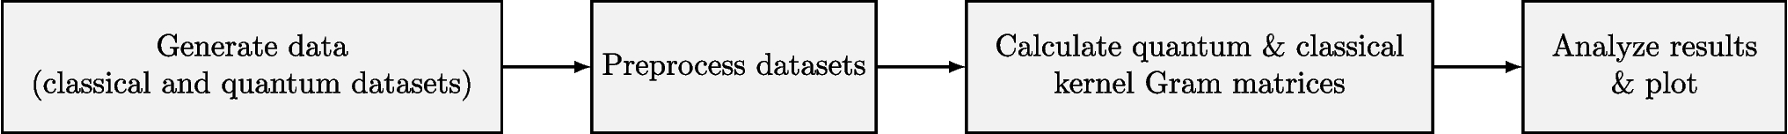



The software can be installed from pip and can be used either as a command-line based tool or as a library.

In [ ]:
!pip install prince

In [2]:
!pip install -U quask==2.0.0-alpha1

You can test if the software works with the following command:

In [4]:
import quask

https://quask.readthedocs.io/en/latest/index.html

### Conclusion and Further Exploration
With this tutorial, you have been introduced to the Quantum Advantage Seeker with Kernels (QuASK) and its main features. You've learned how to retrieve and preprocess datasets, apply fixed and trainable kernels, and compare the performance of different kernels using QuASK.

Remember that while this tutorial provides a starting point, the real power of QuASK comes from its flexibility and extensibility. You're encouraged to explore different datasets, try out different kernels, create your own custom kernels and feature maps, and generally experiment to find the best solutions for your quantum machine learning tasks.

Happy quantum computing!

## Software Engineering

Investing in software engineering best practices is important. Here are ten

* Git: Use Git for version control to keep track of code changes, making collaboration and code sharing easy. Learn more [here](https://learngitbranching.js.org/)

* Unit Testing: Write tests for your code to ensure its robustness and confidence in refactoring. Learn more [here](https://realpython.com/pytest-python-testing/)

* Virtual Environments: Use virtual environments for reproducible setups and easy installations. Learn more [here](https://www.dataquest.io/blog/a-complete-guide-to-python-virtual-environments/)

* Clean Code: Follow clean code principles for readable, maintainable and robust software. Learn more here

* Design Patterns: Leverage established design patterns to solve common problems in software design. Learn more here

* Packaging in Python: Package your Python code into libraries for easy distribution and installation. Learn more [here](https://packaging.python.org/en/latest/tutorials/packaging-projects/)

* Data Structures and Algorithms: Mastering fundamental data structures and algorithms often provides more value than learning trendy frameworks. Learn more [here](https://www.geeksforgeeks.org/introduction-to-data-structures/)

* Autodocs with Sphinx: Use Sphinx to automatically generate documentation from your code. Learn more [here](https://eikonomega.medium.com/getting-started-with-sphinx-autodoc-part-1-2cebbbca5365)

* Cloud Computing: Develop and run your code on cloud platforms for scalable workflows. Checkout AWS!

* Containers: Use containers to encapsulate your code into standalone, reproducible units of software. Checkout Docker!

* Container Orchestration: Use container orchestration tools to manage and scale your applications. Checkout Kubernetes!

## Quantum Computing

Checkout our favorite tutorials by IBM.

* [Quantum Neural Networks](https://qiskit.org/ecosystem/machine-learning/tutorials/01_neural_networks.html)
* [Quantum Kernels Tutorial](https://qiskit.org/ecosystem/machine-learning/tutorials/03_quantum_kernel.html)
* [Quantum Noise](https://www.tensorflow.org/quantum/tutorials/noise)

## Hyperparameters tuning (Example)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_circles

# Generate synthetic data
X, y = make_circles(n_samples=1000, noise=0.05)

# Grid Search
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, refit=True, verbose=2)
grid.fit(X, y)

# SVM with best parameters
clf = svm.SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
clf.fit(X, y)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='autumn')
plot_svc_decision_function(clf)
plt.title('SVM with tuned parameters')

## Kernel Principal Component Analysis (Example)

In [ ]:
from sklearn.decomposition import KernelPCA

# Generate synthetic data
X, y = make_circles(n_samples=400, factor=.3, noise=.05)
plt.scatter(X[:, 0], X[:, 1], c=y)

# Plot synthetic data
plt.title("Raw data")
plt.show()

# Kernel PCA
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

# Plotting
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.title("Kernel PCA")
plt.show()

## SVM with custom kernel (Exercise)
A fun part about kernels is that you can also implement your own version.
Task: Checkout the plot of the data below and implement your own kernel to separate the data.

In [ ]:
# Todo: Implement your own kernel
def custom_kernel(X, Y):
    return np.dot(X, Y.T)

In [ ]:
from sklearn.datasets import make_circles
from sklearn import svm

# Generate synthetic data
X, y = make_circles(n_samples=100, factor=.3, noise=.05)

# SVM classifier with custom kernel
clf = svm.SVC(kernel=custom_kernel)
clf.fit(X, y)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='autumn')

# Todo: Implement your own kernel such that support vectors are found.
# plot_svc_decision_function(clf)
plt.title('SVM with custom kernel')

Hint: The script gives us error because our simple custom kernel does not find any correct separating hyperplane. Hence, no support vectors found!